<a href="https://colab.research.google.com/github/Thayane25/Aprendizagem_de_Maquina/blob/main/Polinomial_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regressão - previsão de preços de ações

In [1]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import random

# Grupo: Monique, Gustavo Henrique, Gustavo Formagio, Thiago Mota e Thayane Lima

##1 - Ler dados de preços históricos

In [2]:
price_history = pd.read_excel('stock.xlsx', index_col='Stock')

##2 - Verificar se há 30 colunas de vendas

In [3]:
weeksAmount = price_history.shape[1]

print(weeksAmount, 'semanas com preço de fechamento')

1322 semanas com preço de fechamento


##3 - Criar array com cada dia

In [4]:
weeks = np.arange(1, weeksAmount+1).reshape(-1, 1)

print(weeks)

[[   1]
 [   2]
 [   3]
 ...
 [1320]
 [1321]
 [1322]]


##4 - Calcular regressão polinomial para cada stock

In [5]:
tendencies = []

last_historical_week = weeks[-1][0] # semana 1322

years_to_predict_in_weeks = round(365 / 7) * 5 # prever semanas dos últimos 5 anos

future_weeks_to_predict = np.arange(
    last_historical_week - years_to_predict_in_weeks + 1,
    last_historical_week
).reshape(-1, 1)

stock_predictions = {}

for stockTicker, stockPrices in price_history.iterrows():
  model = make_pipeline(PolynomialFeatures(3), LinearRegression()) #LinearRegression()

  model.fit(
      weeks[:-years_to_predict_in_weeks], # array com n.o de cada semana (eixo x)
      stockPrices.values[:-years_to_predict_in_weeks].reshape(-1, 1)) # array com preço no fechamento de cada semana (eixo y)

  # coef = model.coef_[0][0]

  # tendencies.append(coef)

  predicted_prices = list(map(
      lambda p: round(p, 2),
      model.predict(future_weeks_to_predict).flatten()))

  stock_predictions[stockTicker + 'E'] = predicted_prices
  stock_predictions[stockTicker] = list(map(
      lambda p: round(p, 2),
      stockPrices.values[-years_to_predict_in_weeks+1:]))

  print(stockTicker, "prediction finished")


MSFT prediction finished
AAPL prediction finished
VZ prediction finished


In [6]:
df = pd.DataFrame(stock_predictions)
df.to_csv('forecast.csv', index=False, encoding='utf-8')

# print(len(stock_predictions['MSFT']))

##5 - Adicionar coluna de tendência ao DataFrame

In [7]:
# Deixamos de usar regressão linear, por não atender a necessidade de previsão de preços de ações
# price_history['Tendency'] = tendencies

##6 - Selecionar as 3 ações com maior rentabilidade

In [8]:
# tendency = price_history#.sort_values('Tendency', ascending=False).head(3)

##7 - Exibir resultado

In [9]:
# print("Tendência:\n")
# print(tendency[['Tendency']])
print(price_history)

       1999-12-31 16:00:00  2000-01-07 16:00:00  2000-01-14 16:00:00  \
Stock                                                                  
MSFT                 58.38                55.75                56.13   
AAPL                  0.92                 0.88                 0.90   
VZ                   55.46                52.98                50.73   

       2000-01-21 16:00:00  2000-01-28 16:00:00  2000-02-04 16:00:00  \
Stock                                                                  
MSFT                 51.88                49.38                53.31   
AAPL                  0.99                 0.91                 0.96   
VZ                   54.11                51.91                52.76   

       2000-02-11 16:00:00  2000-02-18 16:00:00  2000-02-25 16:00:00  \
Stock                                                                  
MSFT                 50.25                47.50                45.78   
AAPL                  0.97                 1.00               

##8 - Gráfico com os 3 primeiros

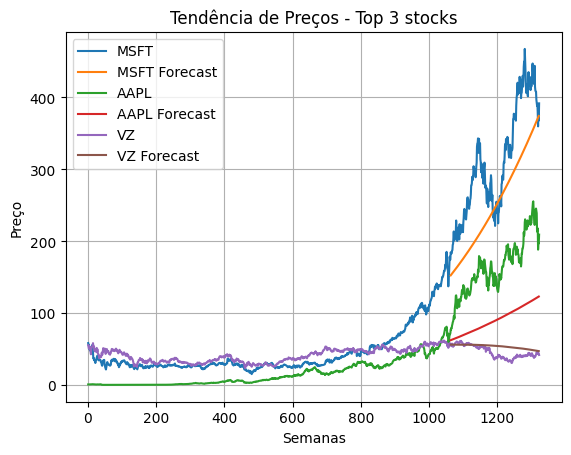

In [10]:
for stock in price_history.index[:3]:
  stockPrices = price_history.loc[stock][0:weeksAmount:1]

  plt.plot(
      range(1, weeksAmount+1),
      stockPrices,
      label=stock
  )

  future_prices = stock_predictions[stock + 'E']

  plt.plot(
      range(weeksAmount+1 - years_to_predict_in_weeks, weeksAmount),
      future_prices,
      label=stock + ' Forecast'
  )

plt.xlabel('Semanas')
plt.ylabel('Preço')
plt.title('Tendência de Preços - Top 3 stocks')
plt.legend()
plt.grid(True)

plt.show()

In [11]:
print(future_prices)

[np.float64(56.22), np.float64(56.22), np.float64(56.23), np.float64(56.24), np.float64(56.24), np.float64(56.25), np.float64(56.25), np.float64(56.26), np.float64(56.26), np.float64(56.27), np.float64(56.27), np.float64(56.28), np.float64(56.28), np.float64(56.28), np.float64(56.29), np.float64(56.29), np.float64(56.29), np.float64(56.29), np.float64(56.3), np.float64(56.3), np.float64(56.3), np.float64(56.3), np.float64(56.3), np.float64(56.3), np.float64(56.3), np.float64(56.3), np.float64(56.3), np.float64(56.3), np.float64(56.3), np.float64(56.3), np.float64(56.3), np.float64(56.3), np.float64(56.3), np.float64(56.3), np.float64(56.29), np.float64(56.29), np.float64(56.29), np.float64(56.29), np.float64(56.28), np.float64(56.28), np.float64(56.27), np.float64(56.27), np.float64(56.27), np.float64(56.26), np.float64(56.26), np.float64(56.25), np.float64(56.24), np.float64(56.24), np.float64(56.23), np.float64(56.23), np.float64(56.22), np.float64(56.21), np.float64(56.2), np.float6